In [9]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from scipy import stats


In [108]:
data = np.loadtxt("/storage/cynthiawu/trans_eQTL/SCZ/rs1702294.012", usecols=1, dtype=int)
data = data.reshape(1, 866)
sample = []
with open("/storage/cynthiawu/trans_eQTL/SCZ/rs1702294.012.indv") as f:
    for line in f:
        ind = line.strip()
        sample.append(ind)
snp = pd.DataFrame(data, columns=sample, index=['chr1_98036428'])

In [109]:
snp

,GTEX-1117F,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,GTEX-113JC,GTEX-117XS,...,GTEX-ZYFD,GTEX-ZYFG,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYW4,GTEX-ZYWO,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPT,GTEX-ZZPU
chr1_98036428,2,1,2,2,2,2,1,2,2,2,...,2,2,2,2,2,2,2,1,2,2


In [31]:
snp_intersect = pd.read_csv('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Brain-Frontal_Cortex__BA9_Euro/chr1_SNP_intersect.tsv', sep='\t', index_col='id')

In [107]:
snp_intersect

,GTEX-1192X,GTEX-11DZ1,GTEX-11EI6,GTEX-11EMC,GTEX-11GSP,GTEX-11TTK,GTEX-11TUW,GTEX-11WQK,GTEX-11ZTS,GTEX-12WSA,...,GTEX-Z93S,GTEX-ZAB4,GTEX-ZDXO,GTEX-ZE7O,GTEX-ZF28,GTEX-ZUA1,GTEX-ZV68,GTEX-ZVT3,GTEX-ZVZQ,GTEX-ZXG5
id,,,,,,,,,,,,,,,,,,,,,
chr1_946247,1,1,1,1,2,1,1,2,1,1,...,2,2,2,1,1,1,2,1,2,0
chr1_965125,1,1,1,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
chr1_973858,1,2,2,1,1,1,1,2,0,1,...,1,1,2,2,1,1,1,2,1,1
chr1_973929,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
chr1_974039,0,0,0,0,0,1,1,0,2,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr1_248362345,1,1,1,0,0,0,0,1,0,0,...,1,1,0,0,0,1,1,0,0,0
chr1_248387675,1,2,2,1,1,1,0,1,2,1,...,1,1,1,2,2,2,1,1,1,1
chr1_248406068,0,1,2,1,1,1,0,0,2,1,...,0,0,1,2,2,1,0,1,1,1


In [34]:
snp = snp[snp_intersect.columns]
snp_all = snp_intersect.append(snp)

In [40]:
snp_all.to_csv("/storage/cynthiawu/trans_eQTL/SCZ/chr1_SNP_intersect_rs1702294.tsv", sep='\t')

In [119]:
def add_snp_to_file(folder, snp_df):
    snp_intersect = pd.read_csv(f'{folder}/chr1_SNP_intersect.tsv', sep='\t', index_col='id')
    snp_df = snp_df[snp_intersect.columns]
    snp_all = snp_intersect.append(snp_df)
    tissue = folder.split('/')[-1]
    tissue_dir = os.path.join('/storage/cynthiawu/trans_eQTL/SCZ', tissue)
    if not os.path.exists(tissue_dir):
        os.mkdir(tissue_dir)
    snp_all.to_csv(f'{tissue_dir}/chr1_SNP_intersect_rs1702294.tsv', sep='\t')

In [120]:
subfolders = [ f.path for f in os.scandir('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER') if f.is_dir() ]
for folder in subfolders:
    add_snp_to_file(folder, snp)

In [27]:
subfolders = [ f.path for f in os.scandir('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER') if f.is_dir() ]
for folder in subfolders:
    tissue = folder.split('/')[-1]
    tissue_dir = os.path.join('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621', tissue)
    if not os.path.exists(tissue_dir):
        os.mkdir(tissue_dir)

In [98]:
os.listdir(path='/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER')


['command_run2_PEER.sh',
 'nohup.out_old',
 'Adipose-Subcutaneous_Euro',
 'Adipose-Visceral__Omentum_Euro',
 'Adrenal_Gland_Euro',
 'Artery-Aorta_Euro',
 'Artery-Coronary_Euro',
 'Artery-Tibial_Euro',
 'Bladder_Euro',
 'Brain-Amygdala_Euro',
 'Brain-Anterior_cingulate_cortex__BA24_Euro',
 'Brain-Caudate__basal_ganglia_Euro',
 'Brain-Cerebellar_Hemisphere_Euro',
 'Brain-Cerebellum_Euro',
 'Brain-Cortex_Euro',
 'Brain-Frontal_Cortex__BA9_Euro',
 'Brain-Hippocampus_Euro',
 'Brain-Hypothalamus_Euro',
 'Brain-Nucleus_accumbens__basal_ganglia_Euro',
 'Brain-Putamen__basal_ganglia_Euro',
 'Brain-Spinal_cord__cervical_c-1_Euro',
 'Brain-Substantia_nigra_Euro',
 'Breast-Mammary_Tissue_Euro',
 'Cells-Cultured_fibroblasts_Euro',
 'Cells-EBV-transformed_lymphocytes_Euro',
 'Cervix-Ectocervix_Euro',
 'Cervix-Endocervix_Euro',
 'Colon-Sigmoid_Euro',
 'Colon-Transverse_Euro',
 'Esophagus-Gastroesophageal_Junction_Euro',
 'Esophagus-Mucosa_Euro',
 'Esophagus-Muscularis_Euro',
 'Fallopian_Tube_Euro',
 

In [99]:
subfolders = [ f.path for f in os.scandir('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER') if f.is_dir() ]


In [100]:
subfolders

['/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Adipose-Subcutaneous_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Adipose-Visceral__Omentum_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Adrenal_Gland_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Artery-Aorta_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Artery-Coronary_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Artery-Tibial_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Bladder_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Brain-Amygdala_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Brain-Anterior_cingulate_cortex__BA24_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Brain-Caudate__basal_ganglia_Euro',
 '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Brain-Cerebellar_Hemisphere_Euro

## QQ plot of matrix eqtl results 

In [24]:
snp_brain = pd.read_csv('/storage/cynthiawu/trans_eQTL/SCZ/Tissues/Brain-Caudate__basal_ganglia_Euro//chr1_98036428_results.tsv', sep='\t')

In [25]:
snp_brain

,SNP,gene,beta,t-stat,p-value,FDR
0,chr1_98036428,ENSG00000151748.14,0.654465,4.676625,0.000006,0.969286
1,chr1_98036428,ENSG00000168234.12,0.555801,4.058387,0.000077,0.971886
2,chr1_98036428,ENSG00000171792.10,0.568952,4.040409,0.000083,0.982431
3,chr1_98036428,ENSG00000114735.9,0.552070,3.860016,0.000165,0.985240
4,chr1_98036428,ENSG00000157625.15,0.511962,3.718228,0.000278,0.989119
...,...,...,...,...,...,...
15471,chr1_98036428,ENSG00000182774.10,0.000033,0.000230,0.999817,0.999998
15472,chr1_98036428,ENSG00000182871.14,-0.000033,-0.000225,0.999821,0.999998
15473,chr1_98036428,ENSG00000132463.13,0.000033,0.000220,0.999824,0.999998
15474,chr1_98036428,ENSG00000239672.7,-0.000019,-0.000136,0.999892,0.999998


Text(0.5, 1.0, 'pvals Brain-Cortex')

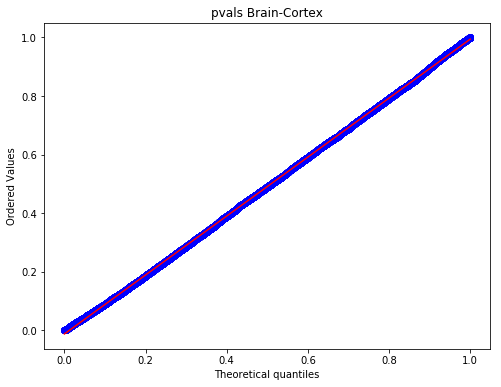

In [26]:
pvals = np.array(snp_brain['p-value'])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
# stats.probplot(-np.log(pvals), dist='expon', plot=ax)
# plt.title('-log(pvals) against exponential dist')
stats.probplot(pvals, dist='uniform', plot=ax)
plt.title('pvals Brain-Cortex')

In [11]:
?stats.probplot